In [144]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib as plt
import seaborn as sns
import textwrap

In [387]:
df = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/QuickFacts Apr-20-2022.csv')

In [388]:
del df["Fact Note"]
del df["Value Note for Detroit city, Michigan"]
del df["Value Note for San Francisco County, California"]


# Race/Ethnicity

In [390]:
race = df.iloc[9:17]
race

,Fact,"Detroit city, Michigan","San Francisco County, California"
9,"White alone, percent",14.4%,52.8%
10,"Black or African American alone, percent",77.1%,5.6%
11,"American Indian and Alaska Native alone, percent",0.4%,0.7%
12,"Asian alone, percent",1.9%,36.0%
13,Native Hawaiian and Other Pacific Islander alo...,0.0%,0.5%
14,"Two or More Races, percent",2.4%,4.5%
15,"Hispanic or Latino, percent",7.7%,15.2%
16,"White alone, not Hispanic or Latino, percent",11.0%,40.2%


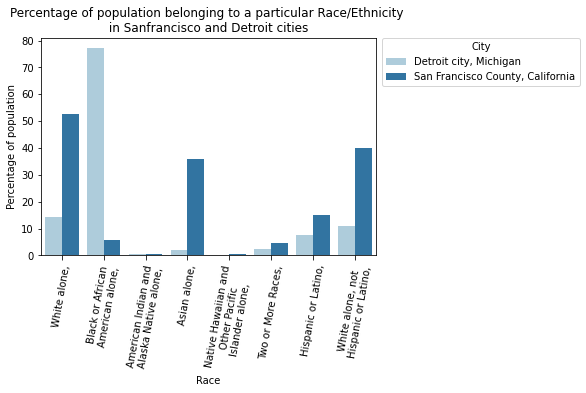

In [155]:
max_width = 20
g = sns.barplot(x="Fact", y= "value", hue="variable", data=x, palette="Paired")
g.tick_params(axis='x', rotation=80, size = 5)
g.set_xlabel("Race", fontsize = 10)
g.set_ylabel("Percentage of population", fontsize = 10)
g.set_title("Percentage of population belonging to a particular Race/Ethnicity \n in Sanfrancisco and Detroit cities ")
g.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in g.get_xticklabels())
g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "City")

# Vaccination rate for Detroit

In [310]:
df_new = pd.read_excel("/Users/arjunanandapadmanabhan/Downloads/\
CopyEthnicity-Race_Coverage_by_County-20210820_733398_7.xlsx")

In [311]:
df_new = df_new[df_new['County']=='Detroit']
df_new

,County,Age Group,Race/Ethnicity,Dose,Residents Vaccinated,Population,Coverage
935,Detroit,12-15 years,Hispanic,Completion,2746,4252.0,64.58%
936,Detroit,12-15 years,Hispanic,Initiation,3470,4252.0,81.61%
937,Detroit,12-15 years,NH Asian/Native Hawaiian/Other Pacific Islands,Completion,200,570.0,35.09%
938,Detroit,12-15 years,NH Asian/Native Hawaiian/Other Pacific Islands,Initiation,228,570.0,40%
939,Detroit,12-15 years,NH Black,Completion,5520,28280.0,19.52%
...,...,...,...,...,...,...,...
4587,Detroit,65-74 years,"Unknown, other or suppressed",Initiation,10811,NaN,NaN
4588,Detroit,75+ years,"Unknown, other or suppressed",Completion,6283,NaN,NaN
4589,Detroit,75+ years,"Unknown, other or suppressed",Initiation,8000,NaN,NaN
4590,Detroit,missing,"Unknown, other or suppressed",Completion,1,NaN,NaN


In [461]:
df2 = df_new.groupby(['Race/Ethnicity', 'Dose']).sum()
df2.drop('Unknown, other or suppressed', axis=0, inplace=True)
df2['Coverage'] = (df2['Residents Vaccinated']/df2['Population'])*100
df2 = df2.reset_index()
df2

,Race/Ethnicity,Dose,Residents Vaccinated,Population,Coverage
0,Hispanic,Completion,36147,50287.0,71.881401
1,Hispanic,Initiation,46361,50287.0,92.192813
2,NH American Indian/Alaska Native,Completion,567,3206.0,17.685590
3,NH American Indian/Alaska Native,Initiation,675,3627.0,18.610422
4,NH Asian/Native Hawaiian/Other Pacific Islands,Completion,3356,10836.0,30.970838
5,NH Asian/Native Hawaiian/Other Pacific Islands,Initiation,3842,10836.0,35.455888
6,NH Black,Completion,148776,483166.0,30.791902
7,NH Black,Initiation,169353,483166.0,35.050687
8,NH White,Completion,23337,67659.0,34.492085
9,NH White,Initiation,26139,67659.0,38.633441


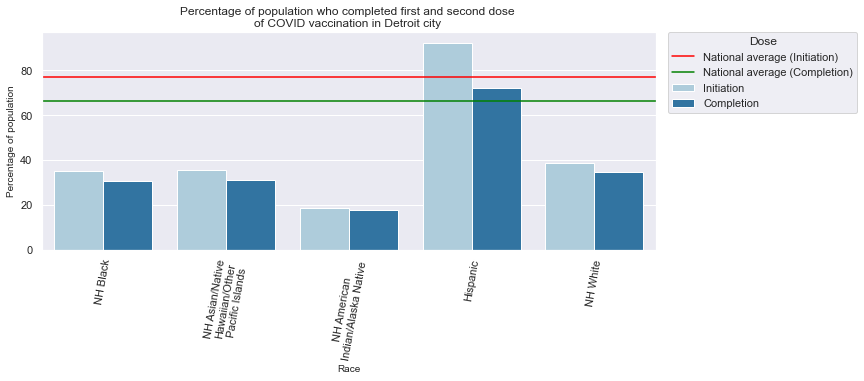

In [488]:
max_width = 20
hueorders = ['Initiation', 'Completion']
orders = ['NH Black', 'NH Asian/Native Hawaiian/Other Pacific Islands', 'NH American Indian/Alaska Native','Hispanic', 'NH White']
g = sns.barplot(x="Race/Ethnicity", y= "Coverage", hue="Dose", hue_order=hueorders, order=orders, data=df2, palette="Paired")
g.tick_params(axis='x', rotation=80, size = 5)
g.set_xlabel("Race", fontsize = 10)
g.set_ylabel("Percentage of population", fontsize = 10)
g.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in g.get_xticklabels())
labels = ['Initiation', 'Completion', "National average (Initiation)", "National average (Completion)"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle

# g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "Dose", label=labels)
g.set_title("Percentage of population who completed first and second dose \nof COVID vaccination in Detroit city ")
g.axhline(77, color="red", label= "National average (Initiation)")
g.axhline(66, color="green", label=  "National average (Completion)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,handles = handles[1:], labels = labels, title="Dose")

# Vaccination progress of San Francisco

In [290]:
sf_new = pd.read_excel("/Users/arjunanandapadmanabhan/Downloads/COVID-19_SF_Race.xlsx")

In [449]:
sf_new

,County,Race/Ethnicity,Dose,Residents Vaccinated,Population,Coverage
0,San Francisco County,NH Black,Initiation,32019,43782,73.132794
1,San Francisco County,NH Asian/Native Hawaiian/Other Pacific Islands,Initiation,256324,301042,85.145594
2,San Francisco County,American Indian or Alaska Native,Initiation,1495,1634,91.493268
3,San Francisco County,Hispanic or Latino,Initiation,123310,133314,92.495912
4,San Francisco County,NH White,Initiation,254674,354423,71.855946
5,San Francisco County,NH Black,Completition,29262,43782,66.835686
6,San Francisco County,NH Asian/Native Hawaiian/Other Pacific Islands,Completition,241503,301042,80.222361
7,San Francisco County,American Indian or Alaska Native,Completition,1239,1634,75.826193
8,San Francisco County,Hispanic or Latino,Completition,109215,133314,81.923129
9,San Francisco County,NH White,Completition,236097,354423,66.614469


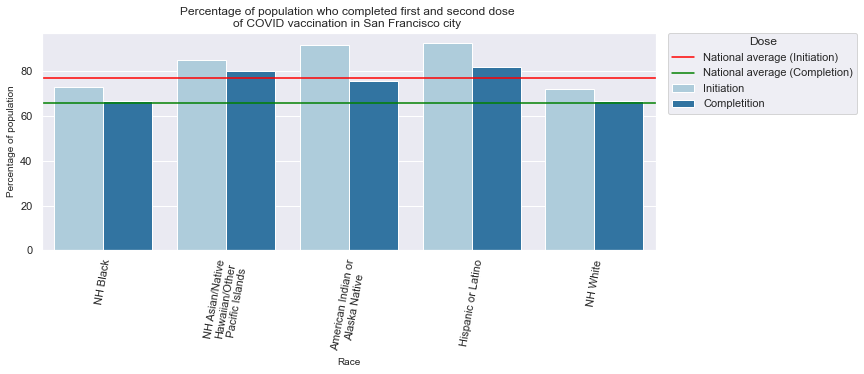

In [486]:
max_width = 20

g = sns.barplot(x="Race/Ethnicity", y= "Coverage", hue="Dose",  data=sf_new, palette="Paired")
g.tick_params(axis='x', rotation=80, size = 5)
g.set_xlabel("Race", fontsize = 10)
g.set_ylabel("Percentage of population", fontsize = 10)
g.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in g.get_xticklabels())
# g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "Dose")
g.set_title("Percentage of population who completed first and second dose \nof COVID vaccination in San Francisco city ")
labels = ['Initiation', 'Completion', "National average (Initiation)", "National average (Completion)"]
handles, _ = ax.get_legend_handles_labels()
g.axhline(77, color="red", label= "National average (Initiation)")
g.axhline(66, color="green", label=  "National average (Completion)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,handles = handles[1:], title="Dose", labels = labels)

# Education Attainment

In [330]:
education_city = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/ACSST5Y2020.S1501-2022-04-21T221139.csv')

In [350]:
education_city = education_city.dropna()

In [391]:
education_city 

,Race/Ethnicity,Education Attainment,City,Population,Percent
0,White alone,High school graduate or higher,Detroit,"50,403",78.5
1,"White alone, not Hispanic or Latino",High school graduate or higher,Detroit,"44,524",83.8
2,Black alone,High school graduate or higher,Detroit,"285,581",83.9
3,American Indian or Alaska Native alone,High school graduate or higher,Detroit,"1,626",84.6
4,Asian alone,High school graduate or higher,Detroit,"5,975",76.2
5,Native Hawaiian and Other Pacific Islander...,High school graduate or higher,Detroit,80,95.2
6,Hispanic or Latino Origin,High school graduate or higher,Detroit,"13,813",53.5
7,White alone,Bachelor's degree or higher,Detroit,"20,302",31.6
8,"White alone, not Hispanic or Latino",Bachelor's degree or higher,Detroit,"19,244",36.2
9,Black alone,Bachelor's degree or higher,Detroit,"44,099",13.0


In [348]:
# education_city['Percent'] = education_city['Percent'].str.rstrip('%').astype('float') 

In [344]:
education_city_highschool = education_city[education_city['Education Attainment']== 'High school graduate or higher'] 

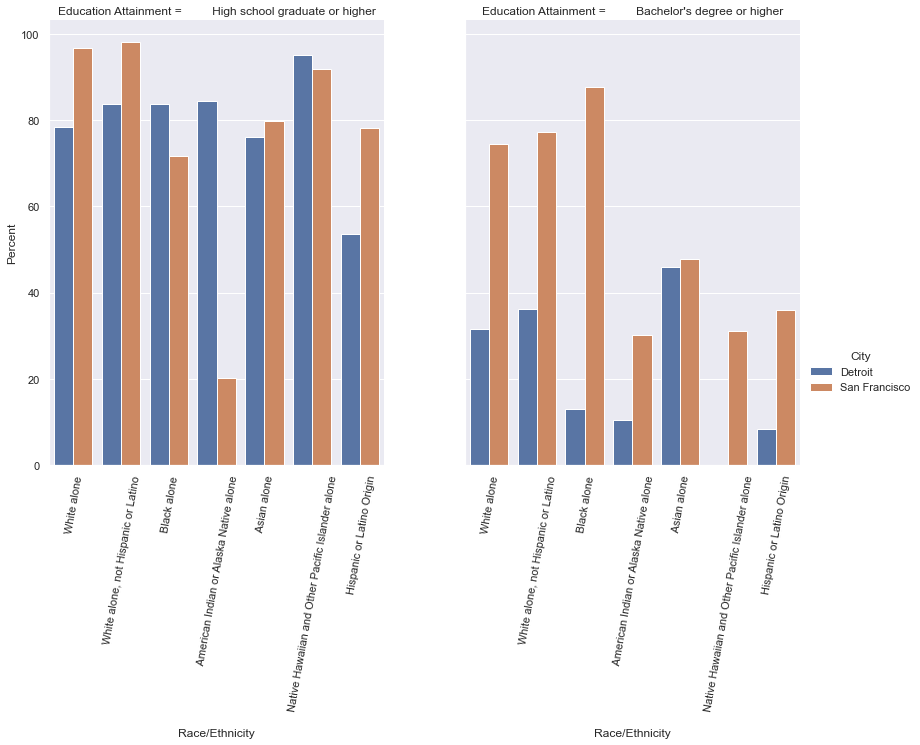

In [394]:
max_width = 20
g = sns.catplot(x="Race/Ethnicity", y="Percent",
                hue="City", col="Education Attainment",
                data=education_city, kind="bar",
                height=7, aspect=.8)
g.set_xticklabels(rotation=80)

# Poverty Rate

In [399]:
poverty_city = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/Poverty_data.csv')

In [400]:
poverty_city['Percent'] = poverty_city['Percent'].str.rstrip('%').astype('float') 

In [404]:
poverty_city

,City,Race/Ethnicity,Percent,Unnamed: 3
0,San Francisco,White alone,7.7,NaN
1,San Francisco,Black or African American alone,26.1,NaN
2,San Francisco,American Indian and Alaska Native alone,23.9,NaN
3,San Francisco,Asian alone,9.9,NaN
4,San Francisco,Native Hawaiian and Other Pacific Isla...,13.0,NaN
5,San Francisco,Hispanic or Latino origin (of any race),13.4,NaN
6,Detroit,White alone,32.7,NaN
7,Detroit,Black or African American alone,33.5,NaN
8,Detroit,American Indian and Alaska Native alone,41.7,NaN
9,Detroit,Asian alone,35.3,NaN


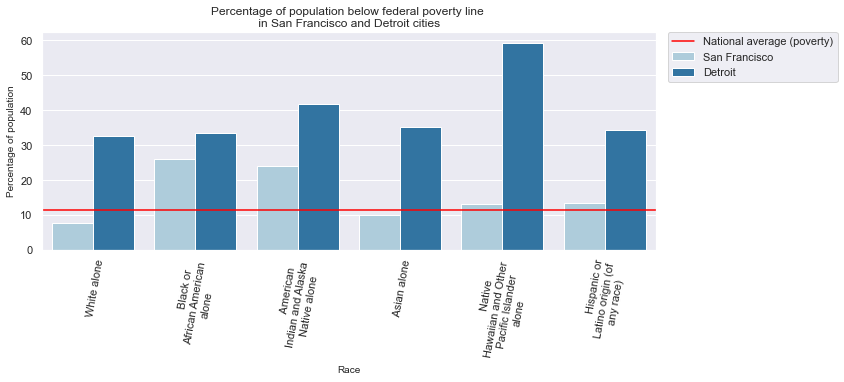

In [475]:
max_width = 20
g = sns.barplot(x="Race/Ethnicity", y= "Percent", hue="City", data=poverty_city, palette="Paired")
g.tick_params(axis='x', rotation=80, size = 5)
g.set_xlabel("Race", fontsize = 10)
g.set_ylabel("Percentage of population", fontsize = 10)
g.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in g.get_xticklabels())
g.set_title("Percentage of population below federal poverty line \n in San Francisco and Detroit cities ")
g.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = "Dose")
g.axhline(11.4, color="red", label="National average (poverty)")
labels = ['San Francisco', 'Detroit', "National average (poverty)"]
handles, _ = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,handles = handles[1:], labels = labels)

# Median Income 

In [434]:
sf_income = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/Sf_income.csv')

In [435]:
sf_income = pd.DataFrame(sf_income)


In [436]:
import pandas as pd


In [437]:
sf_income.describe()

,Income
count,6.000000
mean,50682.833333
std,24563.584400
min,28854.000000
25%,39263.500000
50%,40318.000000
75%,54268.000000
max,96777.000000


In [438]:
detroit_income = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/Detroit_income.csv')


In [439]:
detroit_income.describe()

,Median Income,Unnamed: 3
count,6.000000,0.0
mean,20461.333333,NaN
std,4141.813934,NaN
min,14676.000000,NaN
25%,18132.750000,NaN
50%,20107.000000,NaN
75%,23576.000000,NaN
max,25671.000000,NaN


In [440]:
median_income = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/Sf_income.csv')